In [45]:
%cd loqui
! git checkout main && git pull origin main

!pip install -r requirements.txt

[Errno 2] No such file or directory: 'loqui'
/tf/loqui
Already on 'main'
Your branch is up to date with 'origin/main'.
From https://github.com/aviadshimoni/loqui
 * branch            main       -> FETCH_HEAD
Already up to date.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [46]:
!cat requirements.txt

torch >= 1.3.0
numpy >= 1.16.4
opencv-python >= 4.1.0
PyTurboJPEG
matplotlib~=3.7.1

In [47]:
import torch
import cv2
import numpy as np

In [48]:
def get_frame_sizes(file_name: str) -> list:
    """
    Gets a path to an MP4 video file and returns the size (dimensions) of each frame.
    :param file_name: Path to the MP4 video file.
    :return: List of frame sizes in the given video file.
    """
    cap = cv2.VideoCapture(file_name)
    frame_sizes = []

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            frame_sizes.append(frame.shape[:2])  # Get width and height of the frame
        else:
            break

    cap.release()

    return frame_sizes

file_name = "/tf/single-videos/IMMIGRATION_01001.mp4"
sizes = get_frame_sizes(file_name)
for size in sizes:
    print(size)

(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)
(1440, 1440)


In [49]:
from turbojpeg import TurboJPEG
jpeg = TurboJPEG()


def extract_opencv(file_name: str) -> list:
    """
    Gets a path to a video file, resizes frames to 256x256, and tries to extract the ROI from it.
    :param file_name: Path to the video file.
    :return: ROI of the given video file.
    """
    video = []
    cap = cv2.VideoCapture(file_name)
    while cap.isOpened():
        ret, frame = cap.read()  # BGR
        if ret:
            resized_frame = cv2.resize(frame, (256, 256))
            roi = resized_frame[115:211, 79:175]
            video.append(roi)
        else:
            break
    cap.release()

    return video


In [50]:
def preprocess_frames(frames):
    # Convert frames to numpy arrays
    frames = [np.array(frame, dtype=np.uint8) for frame in frames]

    # Resize the frames
    # resized_frames = [cv2.resize(frame, (256,256)) for frame in frames]

    # Center crop the frames
    cropped_frames = [center_crop(frame, (88,88)) for frame in frames]

    # Convert frames to grayscale
    grayscale_frames = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in cropped_frames]

    # Normalize the frames
    normalized_frames = [(frame / 255.0).astype(np.float32) for frame in grayscale_frames]

    # Stack frames to create a tensor with shape [num_frames, height, width]
    tensor_frames = np.stack(normalized_frames)

    # Add a channel dimension to the tensor
    tensor_frames = np.expand_dims(tensor_frames, axis=1)

    # Convert frames to tensor
    tensor_frames = torch.tensor(tensor_frames)

    return tensor_frames


In [51]:
import torch.nn.functional as F

def center_crop(batch_img, size):
    w, h = batch_img.shape[2], batch_img.shape[1]
    th, tw = size
    x1 = int(round((w - tw)) / 2.)
    y1 = int(round((h - th)) / 2.)
    img = batch_img[:, y1:y1 + th, x1:x1 + tw]

    return img

def plot_frames(frames_to_plot):
    num_frames = frames_to_plot.shape[0]
    for i in range(num_frames):
        frame = frames_to_plot[i]  # Extract the frame
        if frame.ndim == 3:  # If the frame is 3D, reshape it to 2D
            frame = frame.squeeze()
        plt.imshow(frame, cmap='gray')
        plt.axis('off')
        plt.show()


def predict_classes(model, input_tensor):
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = F.softmax(output, dim=1)
        _, predicted_classes = torch.max(probabilities, 1)
        class_percentages = [(idx, p.item() * 100) for idx, p in enumerate(probabilities[0])]
        for idx, percentage in class_percentages:
            print(f"Class {idx}: {percentage:.2f}%")
        return predicted_classes

In [52]:
%matplotlib inline

loaded params/tot params:151/151
miss matched params: []


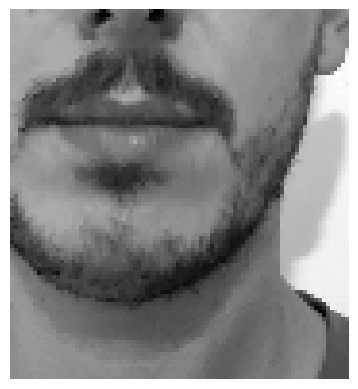

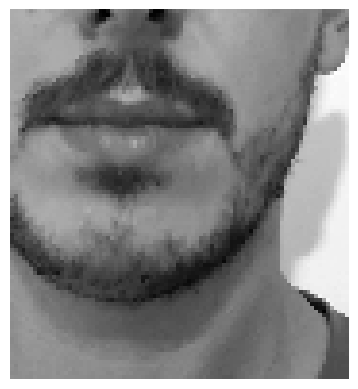

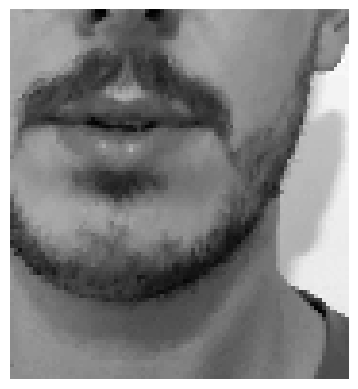

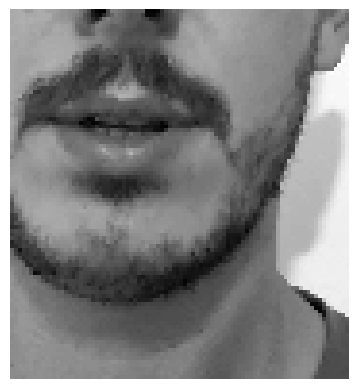

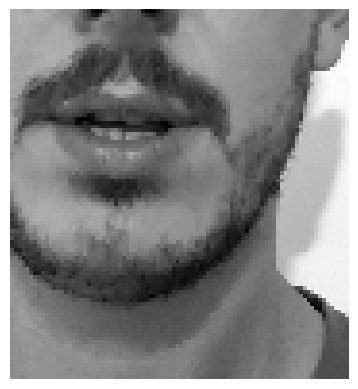

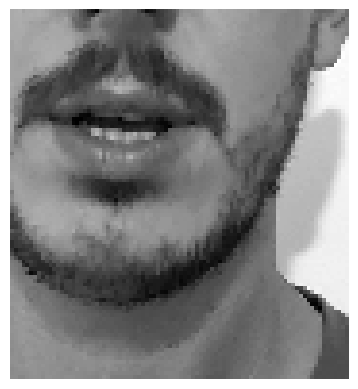

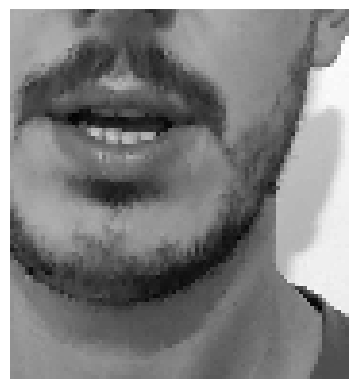

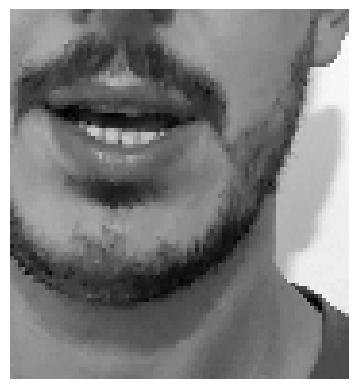

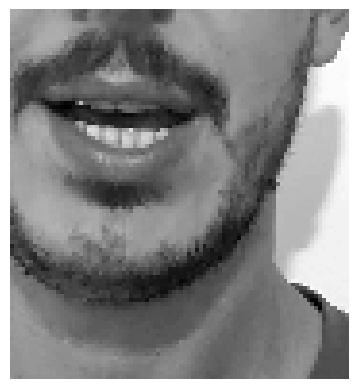

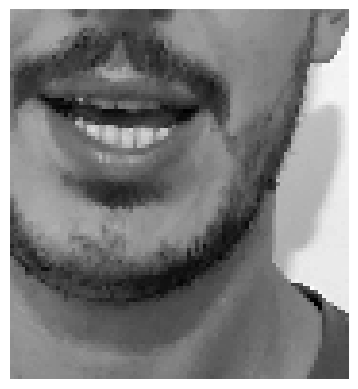

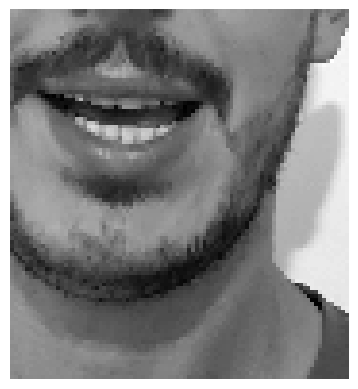

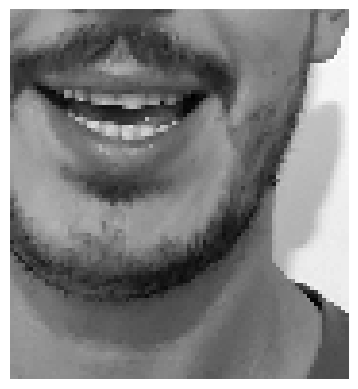

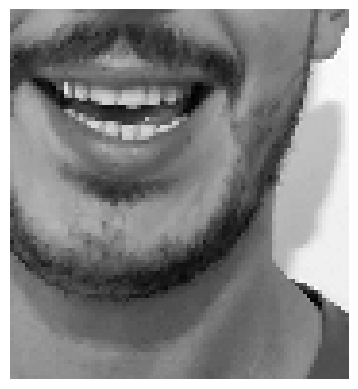

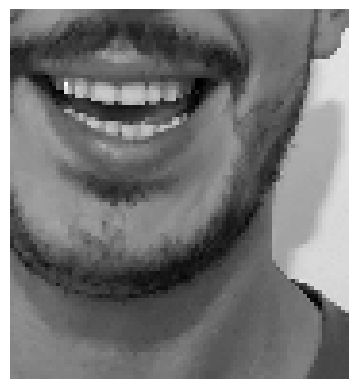

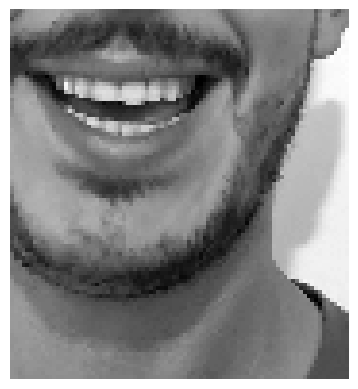

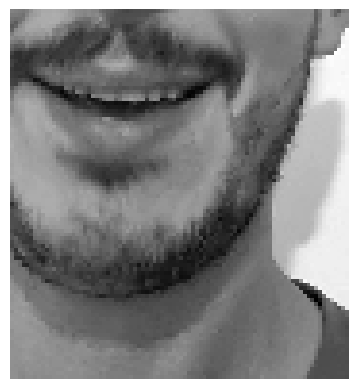

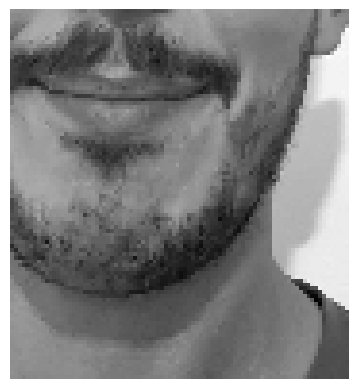

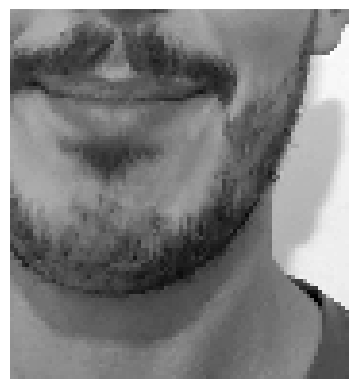

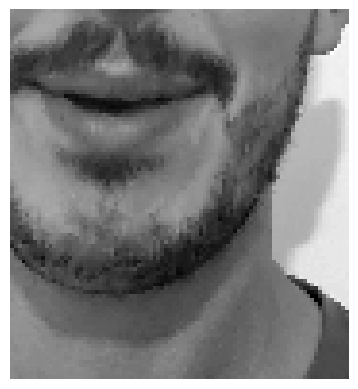

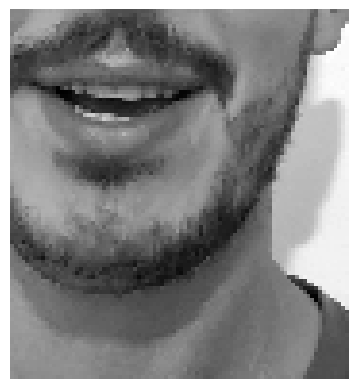

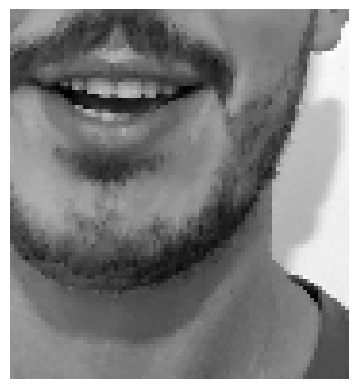

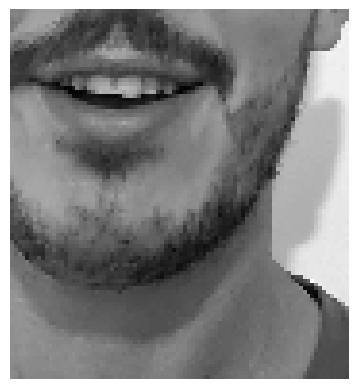

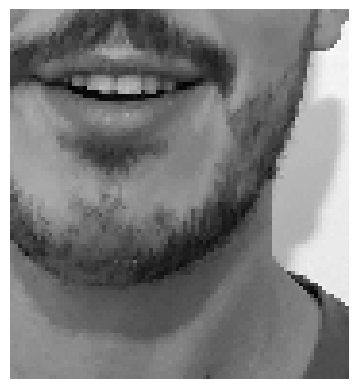

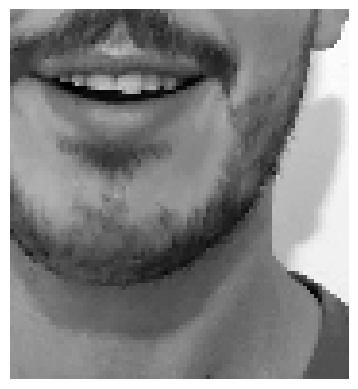

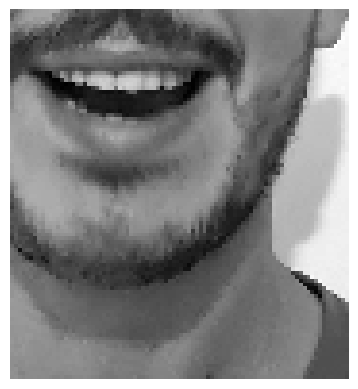

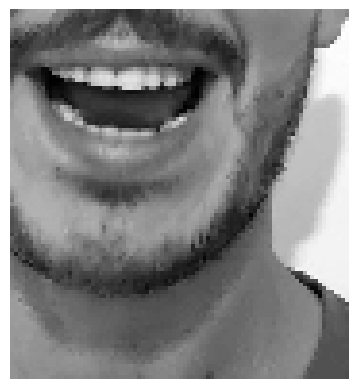

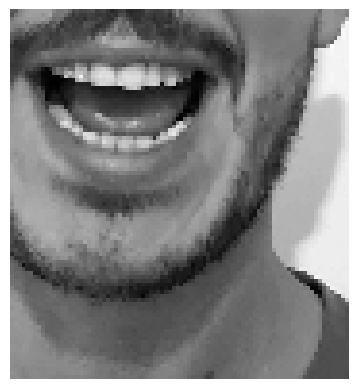

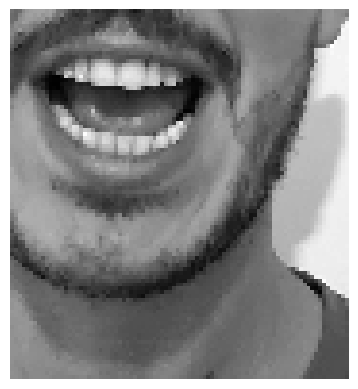

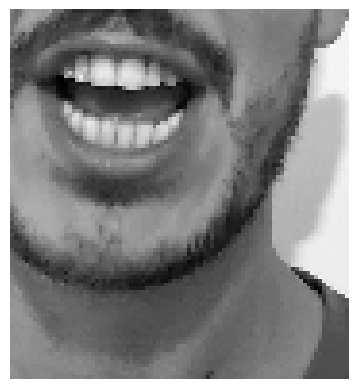

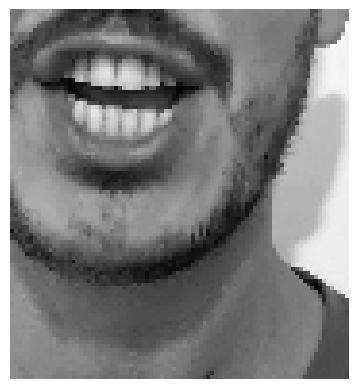

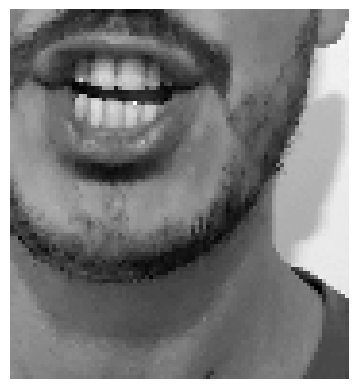

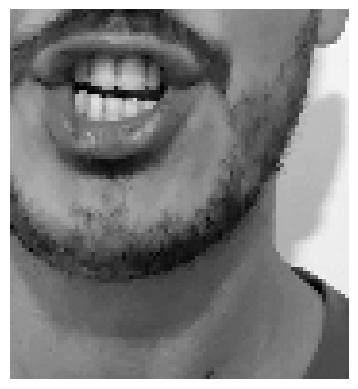

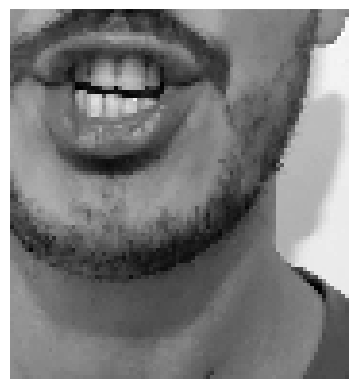

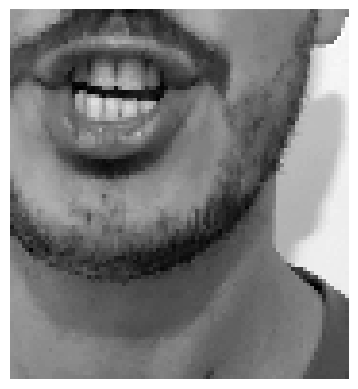

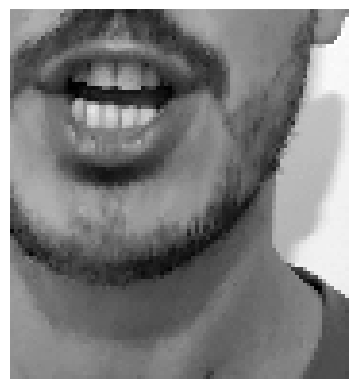

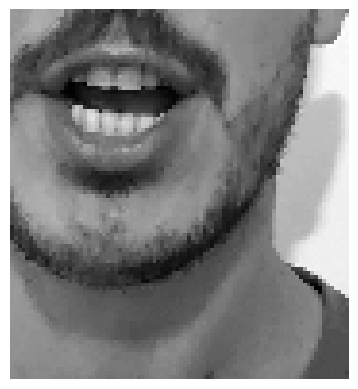

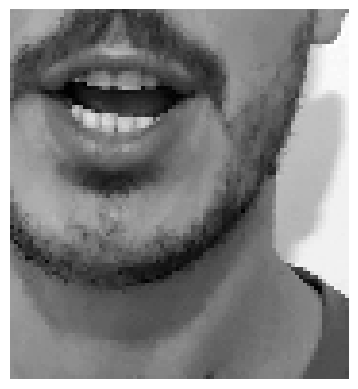

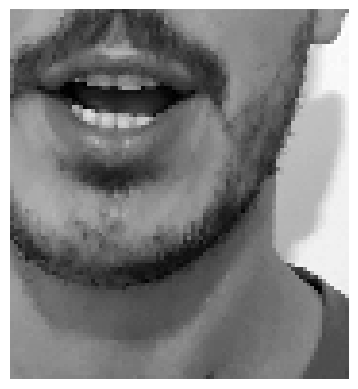

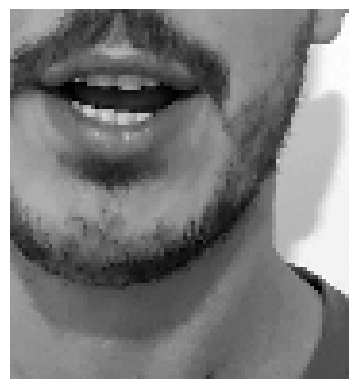

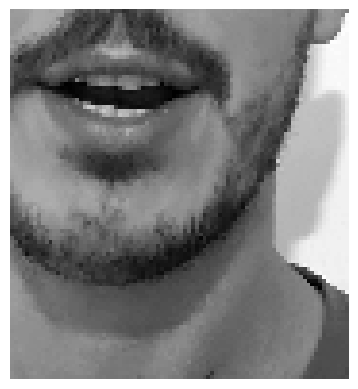

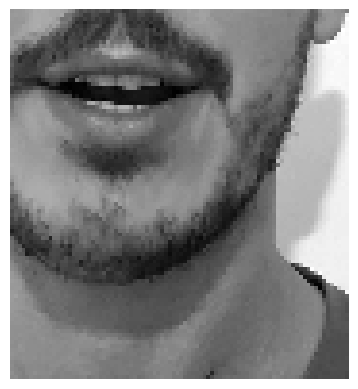

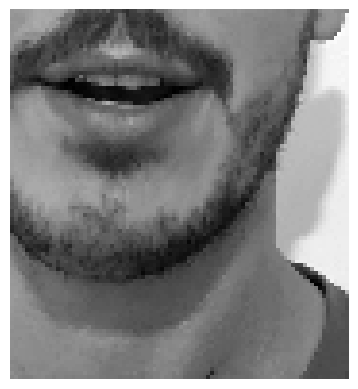

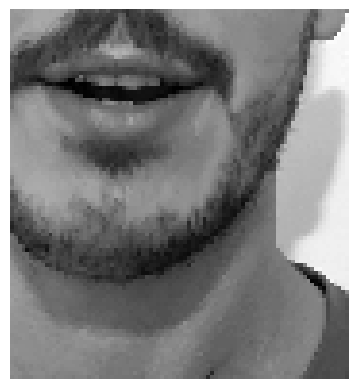

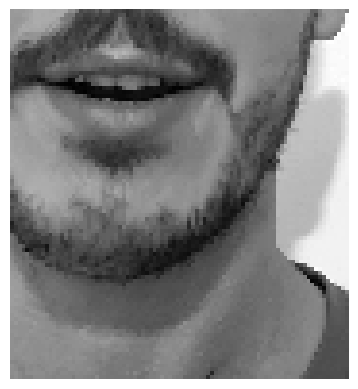

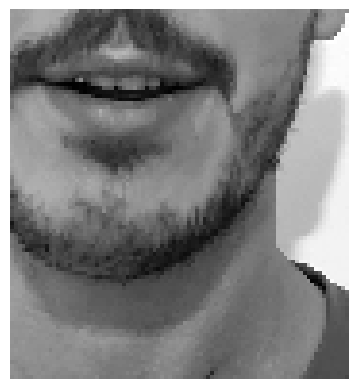

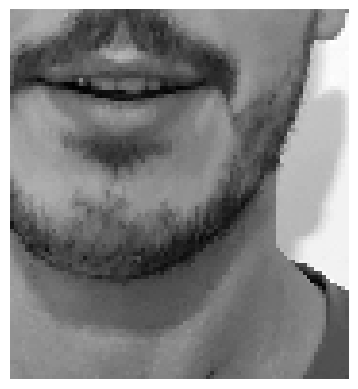

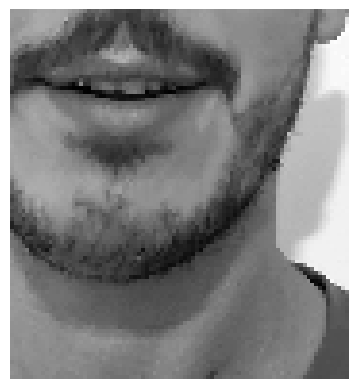

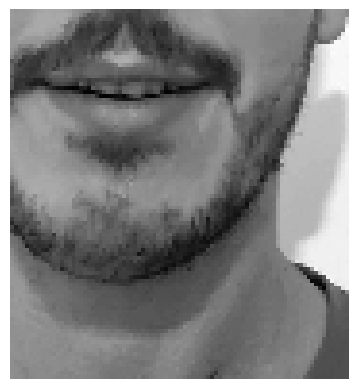

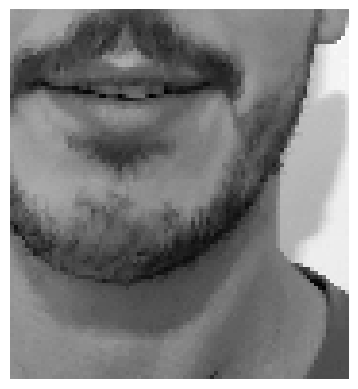

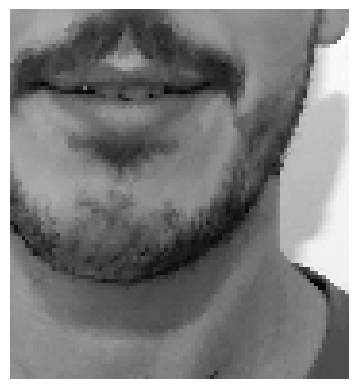

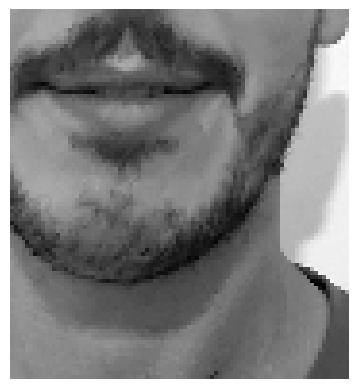

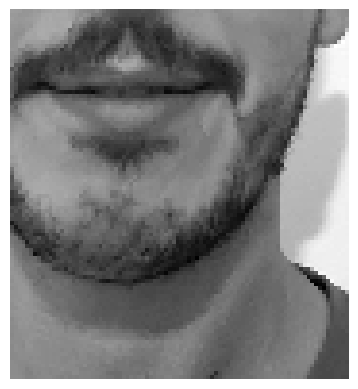

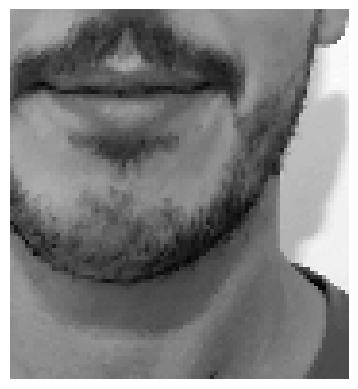

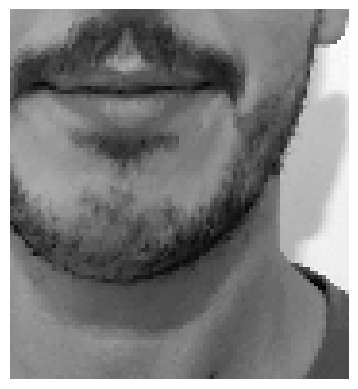

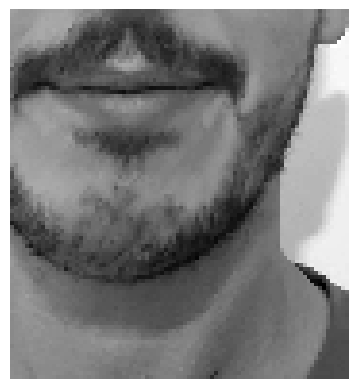

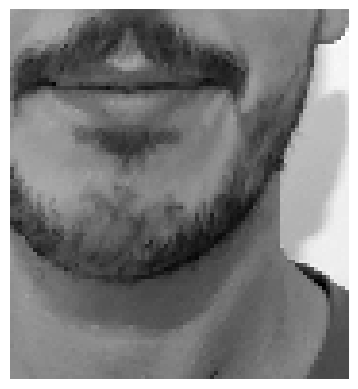

Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.01%
Class 6: 0.00%
Class 7: 0.01%
Class 8: 0.06%
Class 9: 0.00%
Class 10: 0.00%
Class 11: 0.00%
Class 12: 0.00%
Class 13: 0.00%
Class 14: 9.04%
Class 15: 0.01%
Class 16: 0.12%
Class 17: 0.00%
Class 18: 2.43%
Class 19: 0.01%
Class 20: 0.20%
Class 21: 0.07%
Class 22: 0.00%
Class 23: 0.00%
Class 24: 0.00%
Class 25: 0.00%
Class 26: 0.03%
Class 27: 0.02%
Class 28: 0.00%
Class 29: 0.00%
Class 30: 0.10%
Class 31: 0.00%
Class 32: 0.11%
Class 33: 0.00%
Class 34: 0.00%
Class 35: 0.00%
Class 36: 0.00%
Class 37: 0.00%
Class 38: 0.01%
Class 39: 0.00%
Class 40: 0.00%
Class 41: 0.00%
Class 42: 0.06%
Class 43: 0.00%
Class 44: 0.01%
Class 45: 0.39%
Class 46: 0.01%
Class 47: 0.04%
Class 48: 0.00%
Class 49: 0.00%
Class 50: 0.02%
Class 51: 0.00%
Class 52: 0.00%
Class 53: 0.08%
Class 54: 0.01%
Class 55: 0.00%
Class 56: 0.00%
Class 57: 0.00%
Class 58: 0.00%
Class 59: 0.00%
Class 60: 0.00%
Class 61: 0.00%
Class 62: 0.00%
Cl

IndexError: list index out of range

In [54]:
import cv2
from model.model import VideoModel
from utils.helpers import load_missing
import os
import matplotlib.pyplot as plt

labels = []
with open('label_sorted.txt') as myfile:
    labels = myfile.read().splitlines()

# Define the desired input shape for the video model
input_shape = (88, 88)  # Adjust the dimensions according to the model's requirements

def predict(filename, weights_file):
    video_model = VideoModel(500)
    weight = torch.load(weights_file, map_location=torch.device('cpu'))
    load_missing(video_model, weight.get('video_model'))
    video_model.eval()

    # Get the video frames
    raw_frames = extract_opencv(filename)
    # plot_frames(torch.tensor(frames))
    # Preprocess the frames
    frames = preprocess_frames(raw_frames)

    # Access the preprocessed frames tensor
    tensor_frames = frames.squeeze(0)

    # Convert the tensor frames to numpy array
    numpy_frames = tensor_frames.numpy()

    plot_frames(numpy_frames)

    frames = frames.unsqueeze(0)
    predict_classes(video_model, frames)

    # Pass the frames through the model
    with torch.no_grad():
        predictions = video_model(frames)

    # Get the predicted label
    predicted_label = torch.argmax(predictions)
    print(predicted_label)

    predicted_label = predicted_label.item()

    # Print the predicted label
    print("file", filename)
    print(f'Predicted label: {predicted_label}')
    print(f'Prediction: {labels[predicted_label]}')

    return labels[predicted_label]

def predict_all_custom_videos(weights_file):
    folder_path = "/tf/single-videos/custom"
    weights_path = "/tf/weights"
    weight_path = os.path.join(weights_path, weights_file)

    predictions_count = 0
    correct_predictions = 0
    for file_name in os.listdir(folder_path):
        actual = file_name.split("_")[0]
        file_path = os.path.join(folder_path, file_name)
        if file_path.endswith(".mp4"):
            predicted = predict(file_path, weight_path)
            predictions_count += 1

            if actual == predicted:
                correct_predictions += 1

            print(f"correct {correct_predictions}/{predictions_count}")

    if predictions_count > 0:
        print("correct:", correct_predictions)
        print("total:", correct_predictions)
        print("acc:", (correct_predictions/predictions_count)*100.0)

def weights_experiment():
    results = {}
    videos_path = "/tf/single-videos/custom"
    weights_path = "/tf/weights"

    predictions_count = 0
    correct_predictions = 0
    for weights_file in os.listdir(weights_path):
        print("testing", weights_file)
        for file_name in os.listdir(videos_path):
            actual = file_name.split("_")[0]
            file_path = os.path.join(videos_path, file_name)
            weight_path = os.path.join(weights_path, weights_file)

            if file_path.endswith(".mp4"):
                predicted = predict(file_path, weight_path)
                predictions_count += 1

                if actual == predicted:
                    correct_predictions += 1

                print(f"correct {correct_predictions}/{predictions_count}")

        if predictions_count > 0:
            print("weights", weights_file)
            print("correct:", correct_predictions)
            print("total:", correct_predictions)

            acc = (correct_predictions/predictions_count)*100.0
            print("acc:", acc)

            results[weights_file] = acc
            print(results)


    print(results)

predict_all_custom_videos("lrw-cosine-lr-acc-0.85080.pt")